In [2]:
# Importing Required Modules
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

# Root directory ControlNet-Trees
ROOT_DIR = os.path.dirname(os.path.abspath(''))
ROOT_DIR_GIS = os.path.join(ROOT_DIR, 'Google-Image-Scraper')
OUTPUT_DIR = os.path.join(ROOT_DIR_GIS,'photos','tree_steps')


DATASET_DIR = os.path.join(ROOT_DIR_GIS, 'photos','tree_dataset')
DATASET_DIR_TEST = os.path.join(ROOT_DIR_GIS, 'photos','test_dataset')

#### Dev Pipeline: Remove background + binarize + skeletonize

In [3]:
# Only one image
from skeletonize import dev_skeleton_pipeline

dev_skeleton_pipeline(ROOT_DIR_GIS, os.path.join('photos','tree','tree8.webp'))

'Image 8 processed and results saved'

### Opening and Closing
Improve binary image by applying [morphological transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html):
1. opening: remove white noise
2. closing: fill holes 

In [10]:
from skeletonize import opening_closing

def display_open_close(img_nr):
    output_path_bin = os.path.join(OUTPUT_DIR, f'tree{img_nr}_binary.png')
    img = cv2.imread(output_path_bin, cv2.IMREAD_GRAYSCALE)

    opening, closing = opening_closing(img)

    # save image closing
    cv2.imwrite(os.path.join(OUTPUT_DIR, f'tree{img_nr}_closing.png'), closing)

    # Display the results and their skeletons
    fig, ax = plt.subplots(2, 3, figsize=(16, 10))
    ax = np.ravel(ax)
    [axi.set_axis_off() for axi in ax]
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(opening, cmap='gray')
    ax[1].set_title('Opening')
    ax[2].imshow(closing, cmap='gray')
    ax[2].set_title('Closing')
    ax[3].imshow(skeletonize(img), cmap='gray_r')
    ax[4].imshow(skeletonize(opening), cmap='gray_r')
    ax[5].imshow(skeletonize(closing), cmap='gray_r')
    plt.show()

Note: Skeletons shown with black white inverted for better visibility

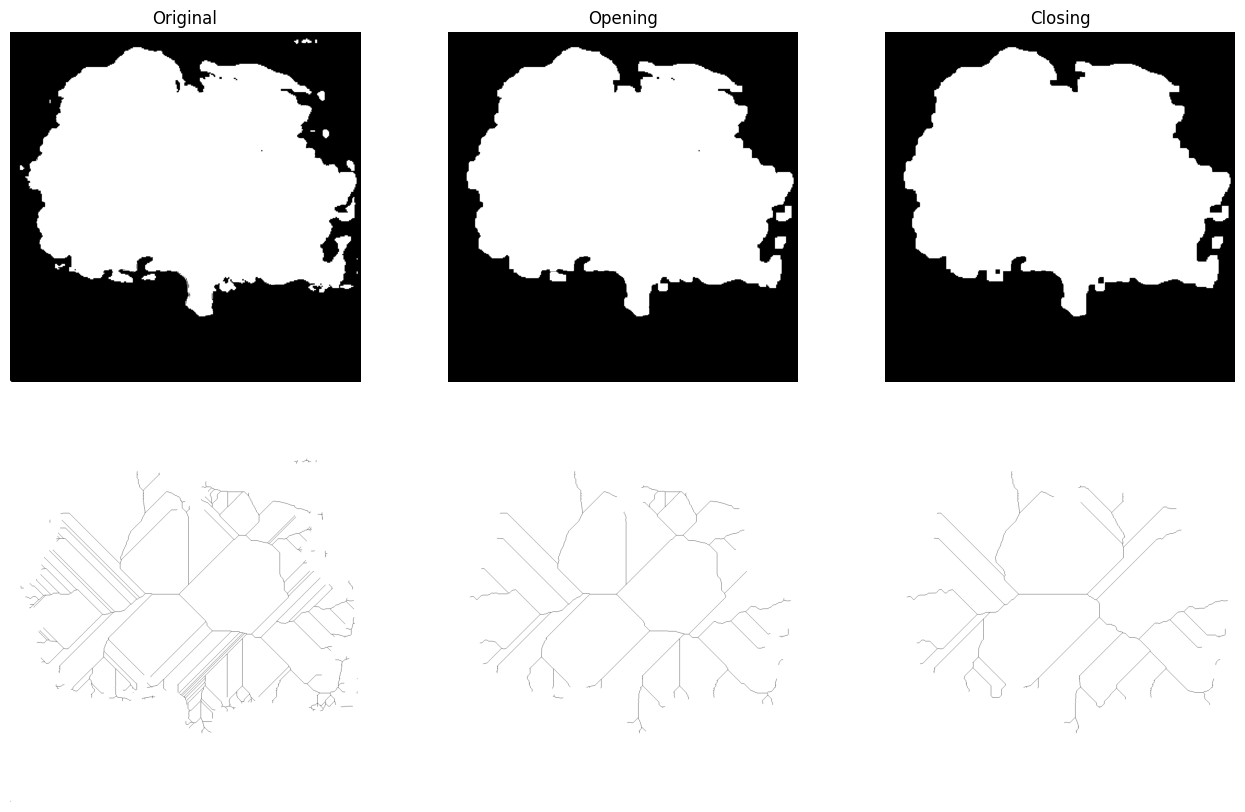

In [11]:
display_open_close(8)

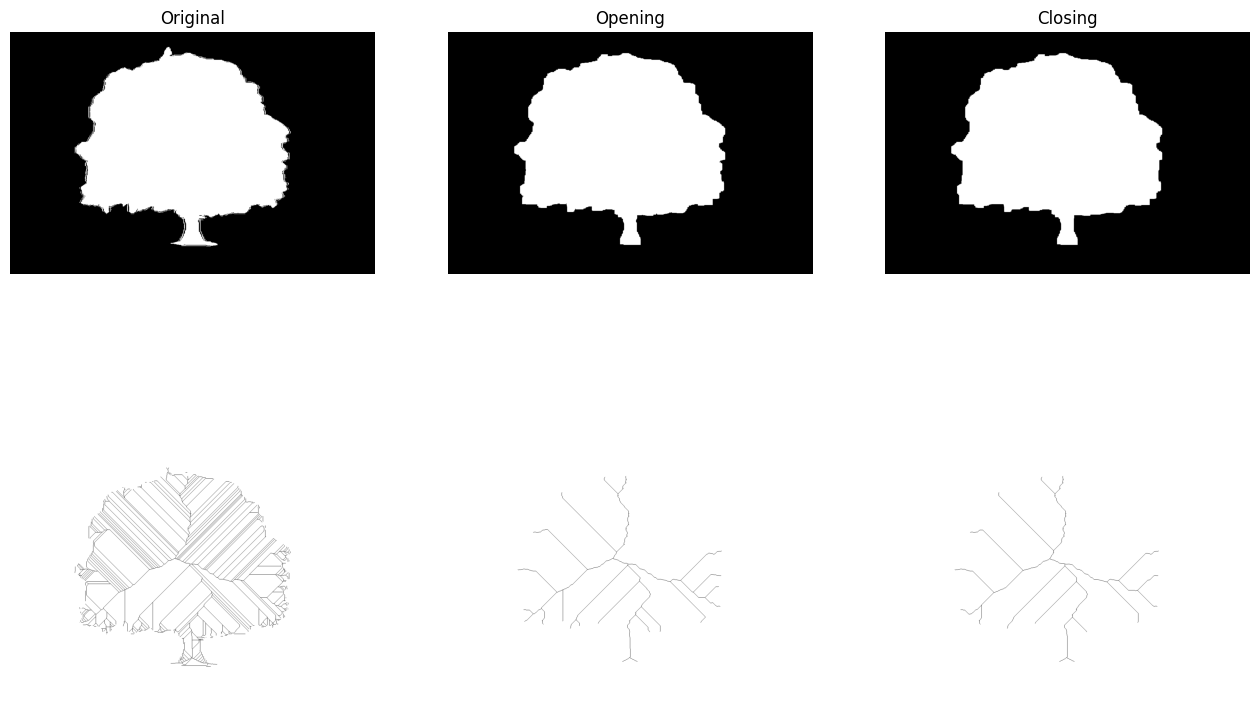

In [12]:
display_open_close(2)

An error occurred: No such file: 'c:\Users\viscom\workspace\tree_project\ControlNet-Trees\Google-Image-Scraper\photos\tree_skeleton\tree4_skel.png'


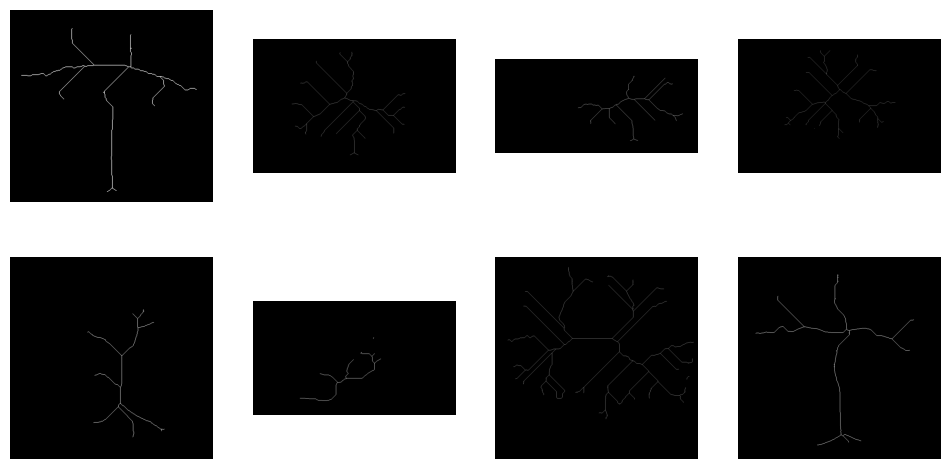

In [ ]:
# display all skeleton images
in_folder = os.path.join(ROOT_DIR_GIS, 'photos','tree_skeleton')

fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = np.ravel(ax)
[axi.set_axis_off() for axi in ax]
ax_nr = 0
for img_nr in range(1,10):
    try:
        img = imread(os.path.join(in_folder, f'tree{img_nr}_skel.png'))
        ax[ax_nr].imshow(img, cmap='gray')
        ax_nr += 1
    except Exception as error:
        print("An error occurred:", error)

plt.show()

### Depth image

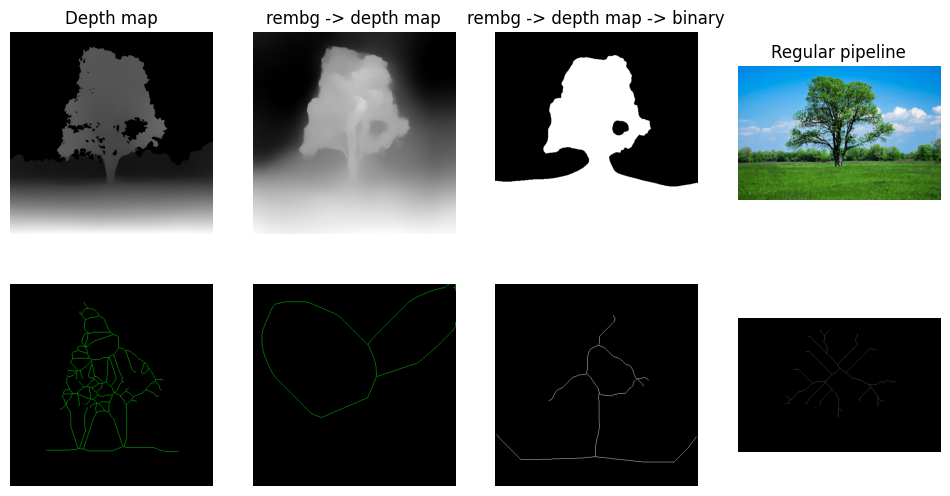

In [ ]:
"""
import sys
sys.path.append('../../stable-diffusion-webui/extensions/sd-webui-controlnet')
from annotator.midas import MidasDetector
"""
from controlnet_aux import MidasDetector

img_nr = 5
img_path = os.path.join(OUTPUT_DIR, f'tree{img_nr}.jpeg') #.webp')
#img_rembg_path = os.path.join(OUTPUT_DIR, f'tree{img_nr}_rembg.png')
img = Image.open(img_path).resize((512, 512))

midas = MidasDetector.from_pretrained("lllyasviel/Annotators")

# Image to depth map
depth_img = midas(img)
depth_img.save(os.path.join(OUTPUT_DIR, f'tree{img_nr}_depth.png'))
skeleton = skeletonize(np.asarray(depth_img))

# Image(removed background) to depth map
#img = remove(img)
img_rembg_path = os.path.join(OUTPUT_DIR, f'tree{img_nr}_rembg.png')
img = Image.open(img_rembg_path).resize((512, 512))
depth_bgimg = midas(img)
depth_bgimg.save(os.path.join(OUTPUT_DIR, f'tree{img_nr}_bgdepth.png'))
skeleton_bg = skeletonize(np.asarray(depth_bgimg))

# Image (rembg & binary) to depth map
depth_cv2 = cv2.cvtColor(np.asarray(depth_bgimg), cv2.COLOR_RGB2GRAY)
th, bin_img = cv2.threshold(depth_cv2, 150, 255, cv2.THRESH_BINARY)
skeleton_bin = skeletonize(np.asarray(bin_img))

# Regular pipeline
img_orig = imread(os.path.join(OUTPUT_DIR, f'tree{img_nr}.jpeg'))
img_bin = cv2.imread(os.path.join(OUTPUT_DIR, f'tree{img_nr}_binary.png'), cv2.IMREAD_GRAYSCALE)
img_skel = cv2.imread(os.path.join(OUTPUT_DIR, f'tree{img_nr}_skel.png'), cv2.IMREAD_GRAYSCALE)

# Display all images
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
[axi.set_axis_off() for axi in ax.ravel()]
ax[0,0].set_title('Depth map')
ax[0,0].imshow(depth_img, cmap='gray')
ax[1,0].imshow(skeleton, cmap='gray')
ax[0,1].set_title('rembg -> depth map')
ax[0,1].imshow(depth_bgimg, cmap='gray')
ax[1,1].imshow(skeleton_bg, cmap='gray')
ax[0,2].set_title('rembg -> depth map -> binary')
ax[0,2].imshow(bin_img, cmap='gray')
ax[1,2].imshow(skeleton_bin, cmap='gray')
ax[0,3].set_title('Regular pipeline')
ax[0,3].imshow(img_orig, cmap='gray')
ax[1,3].imshow(img_skel, cmap='gray')


plt.show()

#### Skeletonize using segmentation labels

Text(0.5, 1.0, 'Skeleton')

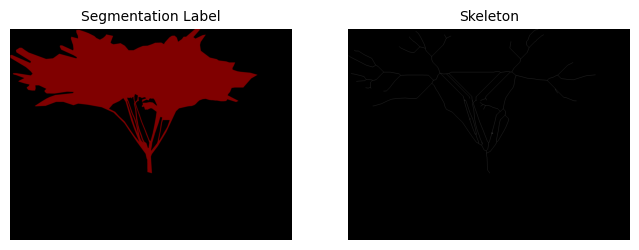

In [ ]:
SEGM_DIR = "C:\\Users\\viscom\\workspace\\tree_project\\tree_images\\UrbanStreet\\segmentation\\VOC2012\\SegmentationClass"
img = cv2.imread(os.path.join(SEGM_DIR,"Acer palmatum_tree_1 (5).png"), cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread(os.path.join(SEGM_DIR,"Acer palmatum_tree_1 (5).png"))
skeleton = skeletonize(img)

# Plot both images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))
ax[0].axis('off')
ax[0].set_title('Segmentation Label', fontsize=10)
ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Skeleton', fontsize=10)

### Compare diff skel algos
https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html

In [15]:
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
from skimage.io import imread


def compare_skel_algos(img_nr):
    output_path_bin = os.path.join(ROOT_DIR_GIS, 'photos','tree_steps',f'tree{img_nr}_binary.png')
    img = imread(output_path_bin)

    # Compute the medial axis (skeleton) and the distance transform
    skel, distance = medial_axis(img, return_distance=True)

    # Compare with other skeletonization algorithms
    skeleton = skeletonize(img)
    skeleton_lee = skeletonize(img, method='lee')

    # Distance to the background for pixels of the skeleton
    dist_on_skel = distance * skel

    fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('original')
    ax[0].axis('off')

    #ax[1].imshow(dist_on_skel, cmap='magma')
    #ax[1].contour(img, [0.5], colors='w')
    ax[1].imshow(skel, cmap=plt.cm.gray)
    ax[1].set_title('medial_axis')
    ax[1].axis('off')

    ax[2].imshow(skeleton, cmap=plt.cm.gray)
    ax[2].set_title('skeletonize')
    ax[2].axis('off')

    ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
    ax[3].set_title("skeletonize (Lee 94)")
    ax[3].axis('off')

    fig.tight_layout()
    plt.show()

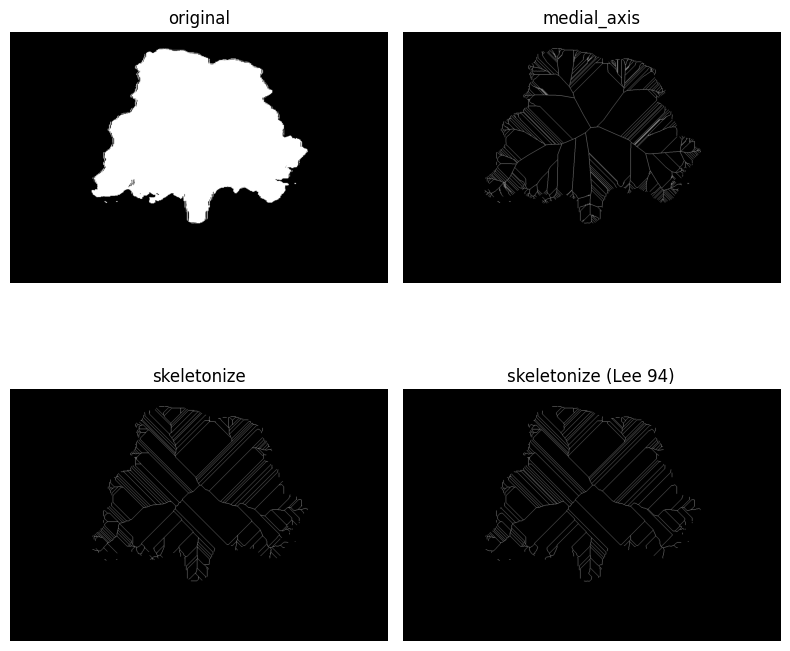

In [16]:
compare_skel_algos(5)

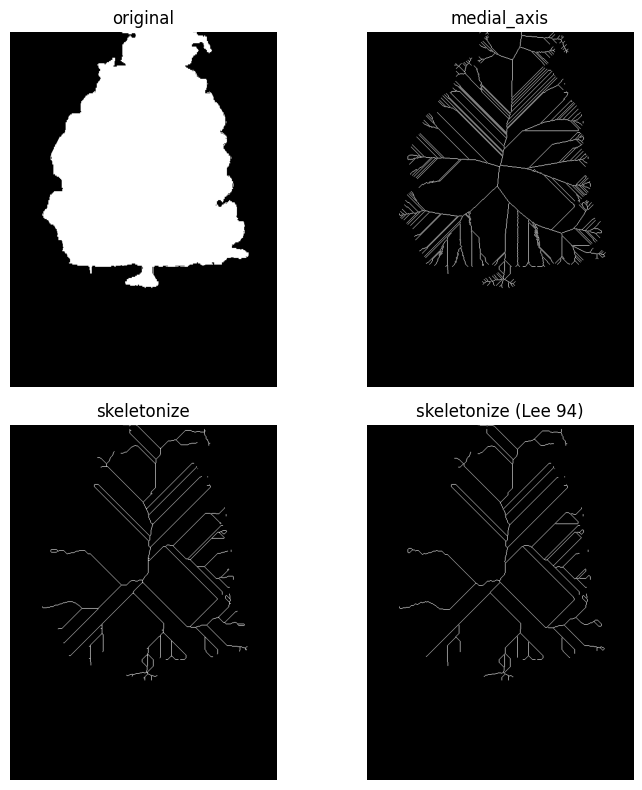

In [17]:
compare_skel_algos(0)